In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lmfit import Model
import numpy as np

In [2]:
# read the kinetic results obtained at specific concentration and temperature e.g., 200ppm and 25oC
df = pd.read_csv('adsorption_kinetics.csv')

# define x and y column
xData_25 = df.loc[:, 'minutes']
yData_25 = df.loc[:, 'qt']

In [3]:
df

,minutes,qt
0,0.000000,0.000000
1,0.054333,0.052299
2,0.108683,0.104615
3,0.163283,0.157171
4,0.217617,0.209470
...,...,...
2151,117.931000,61.657579
2152,117.985667,61.657709
2153,118.040000,61.657772
2154,118.094333,61.657827


### PFO equation

Create a plot of ($q_t$ vs $t$) to calculate 2 parameters ($k_1$, $q_{max}$) using non linear methods:

$q_t =q_{max}(1-(exp(-k_1t))$

In [4]:
param_names = ['k1 in (min-1)', 'qmax in (mg/g)']

def pfo(x, k1, qmax):
    
    return qmax*(1-np.exp(-k1*x))

my_model = Model(pfo)
my_model.set_param_hint('k1', min=0, max=100)
my_model.set_param_hint('qmax', min=0, max=100)

result_PFO_25 = my_model.fit(yData_25, x=xData_25, k1=0, qmax=50)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_PFO_25 = np.array(list(result_PFO_25.best_values.values()))
best_fit_PFO_25 = result_PFO_25.best_fit
best_PFO_25 = pfo(x_eval_25, *best_values_PFO_25)

print(result_PFO_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_PFO_25)

[[Model]]
    Model(pfo)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 54
    # data points      = 2156
    # variables        = 2
    chi-square         = 13354.6692
    reduced chi-square = 6.19993929
    Akaike info crit   = 3935.70623
    Bayesian info crit = 3947.05825
[[Variables]]
    k1:    0.01862030 +/- 1.4804e-04 (0.80%) (init = 0)
    qmax:  74.0132705 +/- 0.27710458 (0.37%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(k1, qmax) = -0.954
-------------------------------
Units ['k1 in (min-1)', 'qmax in (mg/g)'] for [1.86203041e-02 7.40132705e+01]


### B) PSO EQUATION

Create a plot of ($q_t$ vs $t$) to calculate 2 parameters ($k_2$, $q_{max}$) using non linear methods:

$q_t = \frac{k_2q_{max}^2t}{1+k_2q_{max}t}$

In [5]:
param_names = ['k2 in (g mg^-1 min^-1)', 'qmax in (mg/g)']

def pso(x, k2, qmax):
    
    return k2*qmax**2*x/(1+k2*qmax*x)

my_model = Model(pso)
my_model.set_param_hint('k2', min=0, max=1)
my_model.set_param_hint('qmax', min=0, max=100)

result_PSO_25 = my_model.fit(yData_25, x=xData_25, k2=0, qmax=40)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_PSO_25 = np.array(list(result_PSO_25.best_values.values()))
best_fit_PSO_25 = result_PSO_25.best_fit
best_PSO_25 = pso(x_eval_25, *best_values_PSO_25)

print(result_PSO_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_PSO_25)

[[Model]]
    Model(pso)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 62
    # data points      = 2156
    # variables        = 2
    chi-square         = 21049.7424
    reduced chi-square = 9.77239664
    Akaike info crit   = 4916.73419
    Bayesian info crit = 4928.08621
[[Variables]]
    k2:    1.6197e-04 +/- 3.2553e-06 (2.01%) (init = 0)
    qmax:  99.9999997 +/- 0.64346351 (0.64%) (init = 40)
[[Correlations]] (unreported correlations are < 0.100)
    C(k2, qmax) = -0.989
-------------------------------
Units ['k2 in (g mg^-1 min^-1)', 'qmax in (mg/g)'] for [1.61974858e-04 9.99999997e+01]


###  Intraparticle Diffusion (Weber-Morris) Equation

Create a plot of ($q_t$ vs $t$) to calculate 2 parameters ($k_{WM}$, $C$) using non linear methods:

$q_t = k_{WM}t^{0.5}+C$

In [6]:
param_names = ['kwm in (mg g^-1 min^-0.5))', 'C (dimensionless)']

def wm(x, kwm, C):
    
    return kwm*x**(0.5)+C

my_model = Model(wm)
my_model.set_param_hint('kwm', min=0, max=10)
my_model.set_param_hint('C', min=-np.inf, max=100)

result_WM_25 = my_model.fit(yData_25, x=xData_25, kwm=1, C=40)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_WM_25 = np.array(list(result_WM_25.best_values.values()))
best_fit_WM_25 = result_WM_25.best_fit
best_WM_25 = wm(x_eval_25, *best_values_WM_25)

print(result_WM_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_WM_25)

[[Model]]
    Model(wm)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 2156
    # variables        = 2
    chi-square         = 34983.8749
    reduced chi-square = 16.2413532
    Akaike info crit   = 6011.97985
    Bayesian info crit = 6023.33187
[[Variables]]
    kwm:  7.39112289 +/- 0.03383578 (0.46%) (init = 1)
    C:   -9.85542072 +/- 0.26047035 (2.64%) (init = 40)
[[Correlations]] (unreported correlations are < 0.100)
    C(kwm, C) = -0.943
-------------------------------
Units ['kwm in (mg g^-1 min^-0.5))', 'C (dimensionless)'] for [ 7.39112289 -9.85542072]


### AVRAMI EQUATION

Create a plot of ($q_t$ vs $t$) to calculate 3 parameters ($k_{av}$, $q_{max}$, $n_{av}$) using non linear methods:

$q_t = q_{max}(1-exp((-k_{av}t)^{n_{av}}))$

In [7]:
param_names = ['qmax in (mg/g)', 'kav in (min^-1)', 'nav (dimensionless)']

def avrami(x, qmax, kav, nav):
    
    return qmax*(1-np.exp(-(kav*x)**nav))

my_model = Model(avrami)
my_model.set_param_hint('qmax', min=0, max=100)
my_model.set_param_hint('kav', min=0, max=10)
my_model.set_param_hint('nav', min=0, max=10)

result_Avrami_25 = my_model.fit(yData_25, x=xData_25, qmax=11, kav=0.5, nav=0.5)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_Avrami_25 = np.array(list(result_Avrami_25.best_values.values()))
best_fit_Avrami_25 = result_Avrami_25.best_fit
best_Avrami_25 = avrami(x_eval_25, *best_values_Avrami_25)

print(result_Avrami_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_Avrami_25)

[[Model]]
    Model(avrami)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 2156
    # variables        = 3
    chi-square         = 1555.62078
    reduced chi-square = 0.72253636
    Akaike info crit   = -697.675224
    Bayesian info crit = -680.647194
[[Variables]]
    qmax:  63.2983040 +/- 0.05455481 (0.09%) (init = 11)
    kav:   0.02454325 +/- 4.0015e-05 (0.16%) (init = 0.5)
    nav:   1.44166177 +/- 0.00363353 (0.25%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(qmax, kav) = -0.852
    C(qmax, nav) = -0.688
    C(kav, nav)  = 0.531
-------------------------------
Units ['qmax in (mg/g)', 'kav in (min^-1)', 'nav (dimensionless)'] for [6.32983040e+01 2.45432548e-02 1.44166177e+00]


### Bangham Equation

Create a plot of ($q_t$ vs $t$) to calculate 3 parameters ($k_b$, $q_{max}$, $n_b$) using non linear methods:

$q_t =q_{max}(1-(exp(-k_bt^n))$

In [8]:
param_names = ['kb in (min^-n))', 'qmax (mg/g)', 'nb (dimensionless)']

def bangham(x, kb, nb, qmax):
    
    return qmax*(1-np.exp(-kb*x**nb))

my_model = Model(bangham)
my_model.set_param_hint('qmax', min=0, max=80)
my_model.set_param_hint('kb', min=0, max=1)
my_model.set_param_hint('nb', min=0, max=2)

result_Bangham_25 = my_model.fit(yData_25, x=xData_25, kb=0, nb=1, qmax=50)

x_eval_25 = np.linspace(min(xData_25), max(xData_25), 200)

best_values_Bangham_25 = np.array(list(result_Bangham_25.best_values.values()))
best_fit_Bangham_25 = result_Bangham_25.best_fit
best_Bangham_25 = bangham(x_eval_25, *best_values_Bangham_25)

print(result_Bangham_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_Bangham_25)

[[Model]]
    Model(bangham)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 2156
    # variables        = 3
    chi-square         = 1555.63846
    reduced chi-square = 0.72254457
    Akaike info crit   = -697.650711
    Bayesian info crit = -680.622682
[[Variables]]
    kb:    0.00477921 +/- 6.0036e-05 (1.26%) (init = 0)
    nb:    1.44137783 +/- 0.00369282 (0.26%) (init = 1)
    qmax:  63.2961229 +/- 0.05452352 (0.09%) (init = 50)
[[Correlations]] (unreported correlations are < 0.100)
    C(kb, nb)   = -0.987
    C(nb, qmax) = -0.683
    C(kb, qmax) = 0.582
-------------------------------
Units ['kb in (min^-n))', 'qmax (mg/g)', 'nb (dimensionless)'] for [4.77921276e-03 1.44137783e+00 6.32961229e+01]


### Elovich Equation

Create a plot of ($q_t$ vs $t$) to calculate 2 parameters ($a$, $b$) using non linear methods:

$q_t = (1/b)ln(abt)$

In [9]:
param_names = ['a in (mg/g))', 'b (g/mg)']

def elovich(x, a, b):
    
    return (1/b)*np.log(a*b*x)

my_model = Model(elovich)
my_model.set_param_hint('a', min=0, max=80)
my_model.set_param_hint('b', min=0, max=10)

# we are not including the the value for t = 0 to avoid error
result_Elovich_25 = my_model.fit(yData_25[1:], x=xData_25[1:], a=1, b=1)

x_eval_25 = np.linspace(min(xData_25[1:]), max(xData_25[1:]), 200)

best_values_Elovich_25 = np.array(list(result_Elovich_25.best_values.values()))
best_fit_Elovich_25 = result_Elovich_25.best_fit
best_Elovich_25 = elovich(x_eval_25, *best_values_Elovich_25)

print(result_Elovich_25.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_Elovich_25)

[[Model]]
    Model(elovich)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 2155
    # variables        = 2
    chi-square         = 101032.351
    reduced chi-square = 46.9263124
    Akaike info crit   = 8295.68585
    Bayesian info crit = 8307.03694
[[Variables]]
    a:  4.60239858 +/- 0.06433188 (1.40%) (init = 1)
    b:  0.05477589 +/- 4.4626e-04 (0.81%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = 0.816
-------------------------------
Units ['a in (mg/g))', 'b (g/mg)'] for [4.60239858 0.05477589]


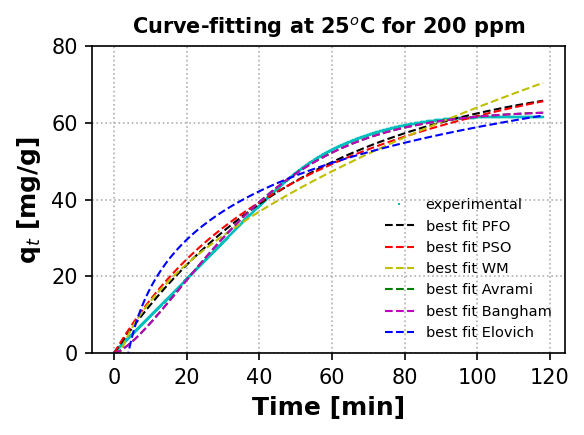

In [10]:
# define the size of the figure
fig, ax = plt.subplots(figsize = (4,3), dpi = 150)

# plot experimental data
ax.plot(xData_25, yData_25, 'c+', mfc = "none", label='experimental', markersize=1)

# plot fitted data
ax.plot(x_eval_25, best_PFO_25, 'k--', label='best fit PFO', linewidth = 1)
ax.plot(x_eval_25, best_PSO_25, 'r--', label='best fit PSO', linewidth = 1)
ax.plot(x_eval_25, best_WM_25, 'y--', label='best fit WM', linewidth = 1)
ax.plot(x_eval_25, best_Avrami_25, 'g--', label='best fit Avrami', linewidth = 1)
ax.plot(x_eval_25, best_Bangham_25, 'm--', label='best fit Bangham', linewidth = 1)
ax.plot(x_eval_25, best_Elovich_25, 'b--', label='best fit Elovich', linewidth = 1)

# edit plot
ax.set_ylim(0, 80)
ax.set_xlabel("Time [min]", fontsize=12, fontweight='bold')
ax.set_ylabel("q$_t$ [mg/g]", fontsize=12, fontweight='bold')
ax.set_title("Curve-fitting at 25$^o$C for 200 ppm", fontsize=10, fontweight='bold', loc = 'center')
ax.legend(frameon=False, fontsize = 7, loc = "lower right")
ax.grid(linestyle = ':')
fig.tight_layout()

### Observations

*Note that reduced chi-square coud be used for assessing the models with lower value indicating better convergence*

Best model to describe the process is **Bangham's**

**Given that Banham model was better to describe the process it was also used at 3 different temperatures. After calculating the rate constants at 4 different temperatures a modified Arrhenius plot was used to help estimate preexponential factor and activation energy**

In [11]:
df_kin = pd.DataFrame({'Value':[0.00478, 0.00583, 0.00728, 0.01956],
                      'Temperature':[298.15, 308.15, 323.15, 373.15]})

# find the average temperature
Taver = df_kin.Temperature.mean()

# define x and y column
xData = df_kin.loc[:, 'Temperature']
yData = df_kin.loc[:, 'Value']

### Modified Arrhenius

Create a plot of ($k$ vs $T$) to calculate parameters ($A$, E$_a$) using non linear methods:

$ k = Aexp(-\frac{E_a}{R}(\frac{1}{T} - \frac{1}{T_{mean}}) $

In [12]:
param_names = ['Ea (J/mol)', 'A in (min^-n))']

def mod_arrhenius(x, Ea, A):
    
    return A*np.exp(-Ea*(1/x - 1/Taver)*(1/8.314))

my_model = Model(mod_arrhenius)
my_model.set_param_hint('Ea', min=0, max=np.inf)
my_model.set_param_hint('A', min=0, max=np.inf)

# we are not including the the value for t = 0 to avoid error
result_Arr = my_model.fit(yData, x=xData, Ea=1000, A=1000)

x_eval = np.linspace(min(xData), max(xData), 200)

best_values_Arr = np.array(list(result_Arr.best_values.values()))
best_fit_Arr = result_Arr.best_fit
best_Arr = mod_arrhenius(x_eval, *best_values_Arr)

print(result_Arr.fit_report())
print('-------------------------------')
print('Units', param_names, 'for', best_values_Arr)

[[Model]]
    Model(mod_arrhenius)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 4
    # variables        = 2
    chi-square         = 4.7649e-07
    reduced chi-square = 2.3824e-07
    Akaike info crit   = -59.7724624
    Bayesian info crit = -60.9998737
[[Variables]]
    Ea:  18300.5433 +/- 845.946429 (4.62%) (init = 1000)
    A:   0.00824232 +/- 2.9429e-04 (3.57%) (init = 1000)
[[Correlations]] (unreported correlations are < 0.100)
    C(Ea, A) = -0.787
-------------------------------
Units ['Ea (J/mol)', 'A in (min^-n))'] for [1.83005433e+04 8.24231794e-03]


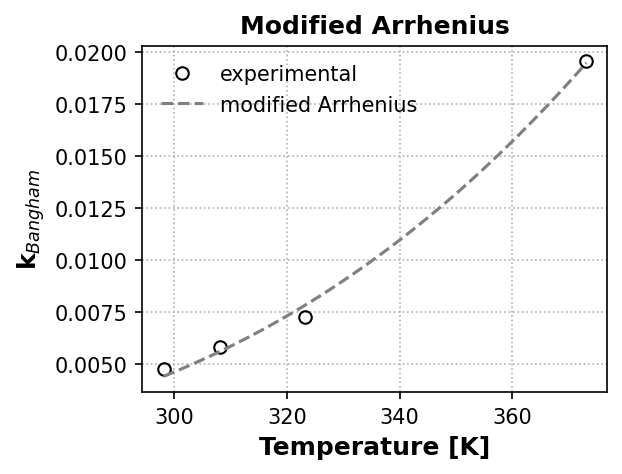

In [13]:
# define the size of the figure
fig, ax = plt.subplots(figsize = (4,3), dpi = 150)

# plot experimental data
ax.plot(xData, yData, 'ko', mfc = "none", label='experimental')

# plot fitted data
ax.plot(x_eval, best_Arr, color = "grey", ls = '--', label='modified Arrhenius')

# edit plot
ax.set_xlabel("Temperature [K]", fontsize=12, fontweight='bold')
ax.set_ylabel("k$_{Bangham}$", fontsize=12, fontweight='bold')
ax.set_title("Modified Arrhenius", fontsize=12, fontweight='bold')
ax.legend(frameon=False)
ax.grid(linestyle=':')